### Linear Regression

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

#### We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars.

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-10-15 17:30:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2019-10-15 17:30:54 (2.72 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [0]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

In [0]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b

In [0]:
loss = tf.reduce_mean(tf.square(y - train_y))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.05) # the learning rate is 0.05

In [0]:
train = optimizer.minimize(loss)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [14]:
loss_values = []
train_data = []
for step in range(100):
  _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
  loss_values.append(loss_val)
  if step % 5 == 0:
    print(step, loss_val, a_val, b_val)
    train_data.append([a_val, b_val])


0 26992.59 77.07106 46.11027
5 1891.721 58.844627 47.595726
10 1762.7241 57.65104 53.01983
15 1653.5896 56.366524 58.023914
20 1559.0441 55.17285 62.682034
25 1477.1372 54.061794 67.01764
30 1406.179 53.027668 71.05308
35 1344.706 52.065136 74.80913
40 1291.4507 51.169243 78.30512
45 1245.3146 50.335384 81.559074
50 1205.3452 49.55925 84.587746
55 1170.7192 48.83685 87.40672
60 1140.7214 48.16447 90.03054
65 1114.734 47.53864 92.472694
70 1092.2205 46.956135 94.74576
75 1072.716 46.413963 96.86146
80 1055.8191 45.90933 98.83067
85 1041.1809 45.43963 100.66356
90 1028.4996 45.002457 102.36954
95 1017.5135 44.595547 103.9574


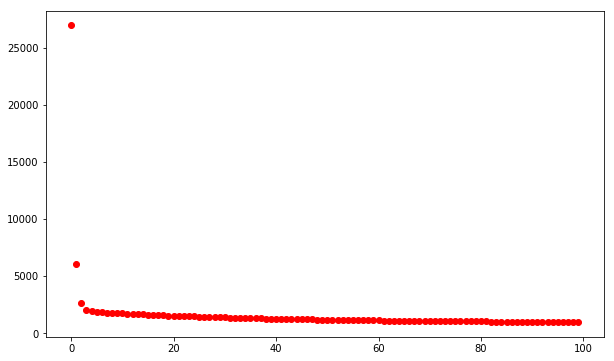

In [15]:
plt.plot(loss_values, 'ro')

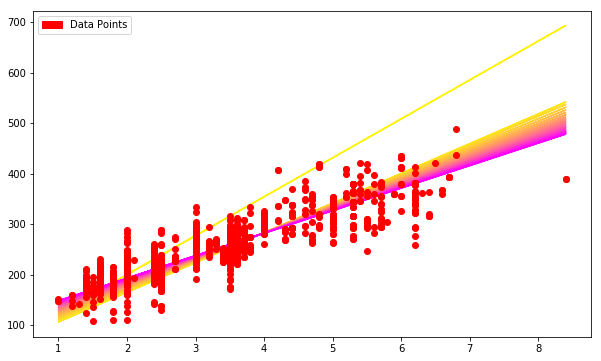

In [19]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
  cb += 1.0 / len(train_data)
  cg -= 1.0 / len(train_data)
  if cb > 1.0: cb = 1.0
  if cg < 0.0: cg = 0.0
  [a, b] = f
  f_y = np.vectorize(lambda x: a*x + b)(train_x)
  line = plt.plot(train_x, f_y)
  plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()